In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from IPython.display import display, HTML
from PIL import Image
import io
import base64

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

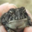

In [5]:
image = Image.fromarray(x_train[25])
display(HTML(f'<p>Изображение до нормализации (индекс 25): {class_names[y_train[25][0]]}</p>'))
display(image)

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

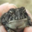

In [7]:
image = Image.fromarray((x_train[25] * 255).astype(np.uint8))
display(HTML(f'<p>Изображение после нормализации (индекс 25): {class_names[np.argmax(y_train[25])]}</p>'))
display(image)


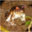
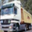
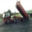
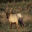
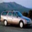
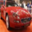
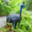
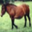
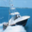
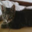
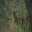
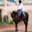
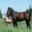
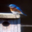
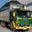
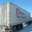
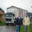
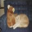
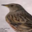
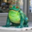
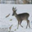
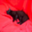
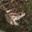
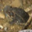
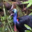

In [8]:
html_content = '<div style="display: grid; grid-template-columns: repeat(5, 100px); gap: 10px;">'
for i in range(25):
    img = Image.fromarray((x_train[i] * 255).astype(np.uint8))
    img_buffer = io.BytesIO()
    img.save(img_buffer, format='PNG')
    img_str = 'data:image/png;base64,' + base64.b64encode(img_buffer.getvalue()).decode('utf-8')
    html_content += f'<div style="text-align: center;"><img src="{img_str}" width="100" /><br>{class_names[np.argmax(y_train[i])]}</div>'
html_content += '</div>'
display(HTML(html_content))

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [12]:
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 33s 42ms/step - loss: 1.4624 - accuracy: 0.4730 - val_loss: 1.1171 - val_accuracy: 0.6039
Epoch 2/50
782/782 [==============================] - 32s 41ms/step - loss: 1.0818 - accuracy: 0.6210 - val_loss: 0.9500 - val_accuracy: 0.6665
Epoch 3/50
782/782 [==============================] - 32s 41ms/step - loss: 0.9397 - accuracy: 0.6685 - val_loss: 0.8651 - val_accuracy: 0.6984
Epoch 4/50
782/782 [==============================] - 31s 40ms/step - loss: 0.8369 - accuracy: 0.7077 - val_loss: 0.8427 - val_accuracy: 0.7082
Epoch 5/50
782/782 [==============================] - 32s 41ms/step - loss: 0.7572 - accuracy: 0.7334 - val_loss: 0.8216 - val_accuracy: 0.7156
Epoch 6/50
782/782 [==============================] - 41s 53ms/step - loss: 0.6879 - accuracy: 0.7598 - val_loss: 0.8033 - val_accuracy: 0.7237
Epoch 7/50
782/782 [==============================] - 37s 47ms/step - loss: 0.6228 - accuracy: 0.7809 - val_loss: 0.7656 - val_accuracy:

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 1.7723 - accuracy: 0.7316
Test loss: 1.7723400592803955
Test acc: 0.7315999865531921


In [15]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 19s 12ms/step


In [16]:
predictions[100]

array([1.73126499e-03, 1.77051186e-06, 5.14131359e-12, 1.26567585e-11,
       1.30192623e-14, 2.52052071e-16, 3.21214274e-14, 3.41538387e-18,
       9.98266697e-01, 2.15373078e-07], dtype=float32)

In [17]:
np.argmax(predictions[100])

8

In [18]:
np.argmax(y_train[100])

8

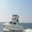

In [19]:
pred_class_idx = np.argmax(predictions[100])
pred_class = class_names[pred_class_idx]
true_class = class_names[np.argmax(y_train[100])]
image = Image.fromarray((x_train[100] * 255).astype(np.uint8))
display(HTML(f'<p>Предсказанный класс: {pred_class}, Истинный класс: {true_class}</p>'))
display(image)